In [28]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
customer = pl.read_csv("Customer Reaction.csv")

In [9]:
mean_household_target = customer.filter(pl.col("Household_Targeted") == 1).select(pl.col("Spending")).mean()
mean_household_not_target = customer.filter(pl.col("Household_Targeted") == 0).select(pl.col("Spending")).mean()
mean_individual_target = customer.filter(pl.col("Individual_targeted") == 1).select(pl.col("Spending")).mean()
mean_individual_not_target = customer.filter(pl.col("Individual_targeted") == 0).select(pl.col("Spending")).mean()

Plot of Household Spending in Target and Control

c:\Users\meala\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\meala\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TypeError: unsupported format string passed to DataFrame.__format__

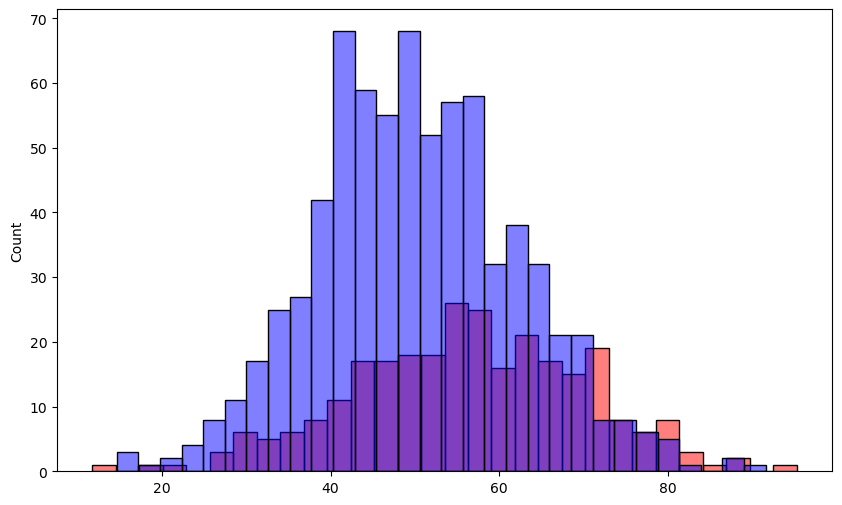

In [19]:
# Extract data for plotting
spending_targeted = customer.filter(pl.col("Household_Targeted") == 1)["Spending"].to_list()
spending_not_targeted = customer.filter(pl.col("Household_Targeted") == 0)["Spending"].to_list()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot histograms
sns.histplot(spending_targeted, bins=30, color='red', alpha=0.5, label='Targeted')
sns.histplot(spending_not_targeted, bins=30, color='blue', alpha=0.5, label='Not Targeted')

# Add mean lines
plt.axvline(mean_household_target, color='red', linestyle='dashed', linewidth=1, label=f'Mean Targeted: {mean_household_target:.2f}')
plt.axvline(mean_household_not_target, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Not Targeted: {mean_household_not_target:.2f}')

# Add labels and title
plt.title('Customer Spending by Household Targeting')
plt.xlabel('Spending')
plt.ylabel('Count')
plt.legend(title='Household Targeted')

# Show the plot
plt.show()

Plot of Individual Spending between Control and Target

c:\Users\meala\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\meala\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


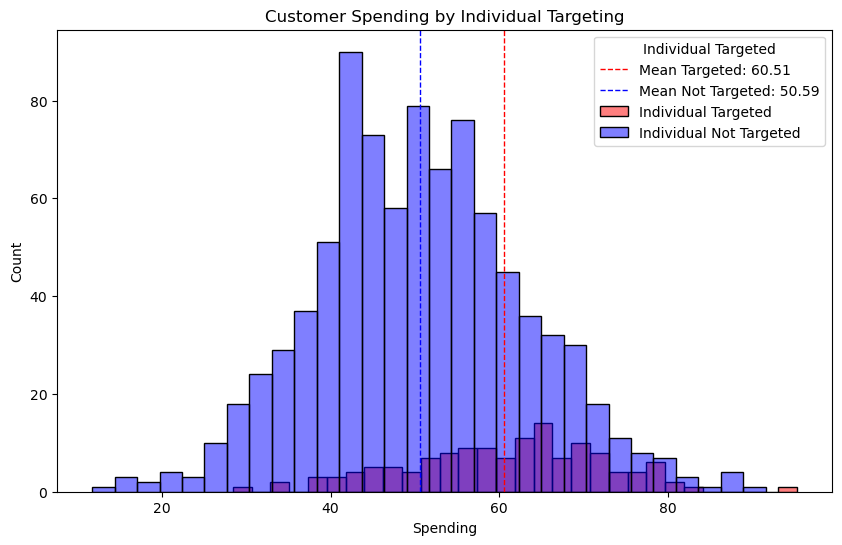

In [18]:
# Extract data for plotting
spending_individual_targeted = customer.filter(pl.col("Individual_targeted") == 1)["Spending"].to_list()
spending_individual_not_targeted = customer.filter(pl.col("Individual_targeted") == 0)["Spending"].to_list()

# Convert mean values to floats
mean_individual_targeted = mean_individual_target.item()
mean_individual_not_targeted = mean_individual_not_target.item()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot histograms
sns.histplot(spending_individual_targeted, bins=30, color='red', alpha=0.5, label='Individual Targeted')
sns.histplot(spending_individual_not_targeted, bins=30, color='blue', alpha=0.5, label='Individual Not Targeted')

# Add mean lines
plt.axvline(mean_individual_targeted, color='red', linestyle='dashed', linewidth=1, label=f'Mean Targeted: {mean_individual_targeted:.2f}')
plt.axvline(mean_individual_not_targeted, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Not Targeted: {mean_individual_not_targeted:.2f}')

# Add labels and title
plt.title('Customer Spending by Individual Targeting')
plt.xlabel('Spending')
plt.ylabel('Count')
plt.legend(title='Individual Targeted')

# Show the plot
plt.show()

In [24]:
customer_spillover = customer.filter(pl.col("Individual_targeted")==0)
mean_individual_from_targetHousehold = customer_spillover.filter(pl.col("Household_Targeted")==1).select(pl.col("Spending")).mean()
mean_individual_from_not_targetHousehold = customer_spillover.filter(pl.col("Household_Targeted")==0).select(pl.col("Spending")).mean()

Customer Spending by Household Targeting but Controlled Individual

c:\Users\meala\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\meala\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


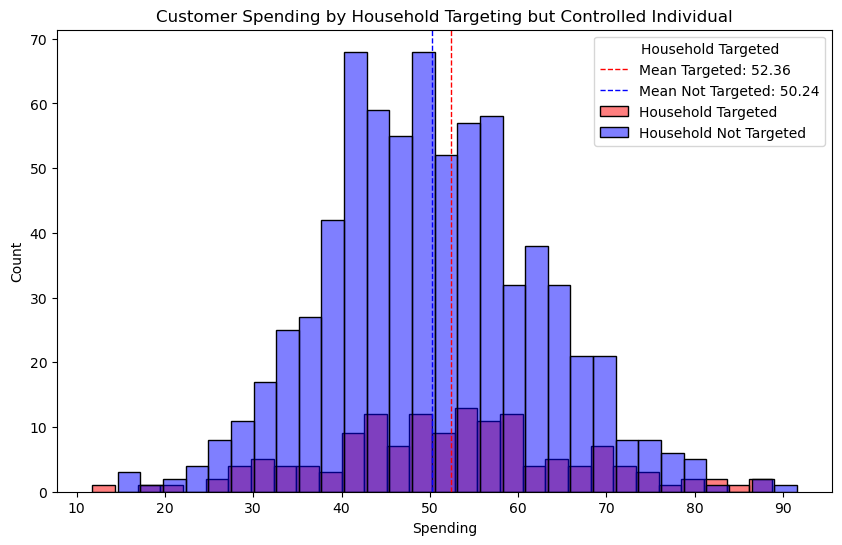

In [25]:
spending_household_targeted = customer_spillover.filter(pl.col("Household_Targeted") == 1)["Spending"].to_list()
spending_household_not_targeted = customer_spillover.filter(pl.col("Household_Targeted") == 0)["Spending"].to_list()

# Convert mean values to floats
mean_individual_from_household_targeted = mean_individual_from_targetHousehold.item()
mean_individual_from_household_not_targeted = mean_individual_from_not_targetHousehold.item()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot histograms
sns.histplot(spending_household_targeted, bins=30, color='red', alpha=0.5, label='Household Targeted')
sns.histplot(spending_household_not_targeted, bins=30, color='blue', alpha=0.5, label='Household Not Targeted')

# Add mean lines
plt.axvline(mean_individual_from_household_targeted, color='red', linestyle='dashed', linewidth=1, label=f'Mean Targeted: {mean_individual_from_household_targeted:.2f}')
plt.axvline(mean_individual_from_household_not_targeted, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Not Targeted: {mean_individual_from_household_not_targeted:.2f}')

# Add labels and title
plt.title('Customer Spending by Household Targeting but Controlled Individual')
plt.xlabel('Spending')
plt.ylabel('Count')
plt.legend(title='Household Targeted')

# Show the plot
plt.show()

In [32]:
# Filter data for the groups
group1 = customer_spillover.filter(pl.col("Household_Targeted") == 1)["Spending"].to_numpy()
group2 = customer_spillover.filter(pl.col("Household_Targeted") == 0)["Spending"].to_numpy()

# Perform Welch's t-test with the correct alternative hypothesis
t_stat, p_value = ttest_ind(group1, group2, alternative='greater', equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")



T-statistic: 1.6583644326556533, P-value: 0.04946727465839486


Extras


In [30]:
# Filter data for the groups
group1 = customer.filter(pl.col("Household_Targeted") == 1)["Spending"].to_numpy()
group2 = customer.filter(pl.col("Household_Targeted") == 0)["Spending"].to_numpy()

# Perform Welch's t-test (equal_var=False) with alternative hypothesis 'greater'
t_stat, p_value = ttest_ind(group1, group2, alternative='greater', equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")



T-statistic: 6.439219323022631, P-value: 1.5482697171553926e-10


In [31]:
# Filter data for the groups
group1 = customer.filter(pl.col("Individual_targeted") == 1)["Spending"].to_numpy()
group2 = customer.filter(pl.col("Individual_targeted") == 0)["Spending"].to_numpy()

# Perform Welch's t-test (equal_var=False) with alternative hypothesis 'greater'
t_stat, p_value = ttest_ind(group1, group2, alternative='greater', equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")



T-statistic: 8.981301358102918, P-value: 1.639061981961644e-16
